In [9]:
'''
This script allows for evaluation of cancer cell line specific models by using CRISPR-ko
data from Cell Model Passports (https://cellmodelpassports.sanger.ac.uk/downloads, accessed 11/01/2025).
'''

'\nThis script allows for evaluation of cancer cell line specific models by using CRISPR-ko\ndata from Cell Model Passports (https://cellmodelpassports.sanger.ac.uk/downloads, accessed 11/01/2025).\n'

In [21]:
# imports
import pathlib
import os
import pandas as pd
import cobra
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Inputs

# cell line name:
cell_line = "A375"

# models identifier:
prefix = "A375_ftINIT"

# get data & model folders
current_dir = pathlib.Path(os.getcwd())
data_dir = current_dir.parent / "datasets" / "validation" / "crispr_ko_fitness_scores" / "Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_scaled_bayesian_factors_20240111.tsv"
model_dir = current_dir.parent / "models"

In [3]:
# read in CRISPR-ko gene essentiality data (as bayesian factor)
df_essentiality = pd.read_csv(data_dir, delimiter="\t")
df_essentiality

C:\Users\phili\AppData\Local\Temp\ipykernel_32352\2812147567.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,model_name,WERI-RB-1,OVCAR-8,UM-UC-10,PE-CA-PJ15,NCI-H1793,SCMC-RM2,SW620,THUR14TKB,Calu-6,...,ORL-153,ORL-156,ORL-174,ORL-204,ORL-207,ORL-214,ORL-215,ORL-166,ORL-188,ORL-195
0,model_id,SIDM01414,SIDM00090,SIDM01408,SIDM00473,SIDM00755,SIDM01346,SIDM00841,SIDM01433,SIDM00921,...,SIDM02004,SIDM02003,SIDM02001,SIDM02008,SIDM01998,SIDM01996,SIDM01995,SIDM02002,SIDM02000,SIDM01999
1,source,Broad,Broad,Broad,Broad,Broad,Broad,Broad,Broad,Broad,...,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger,Sanger
2,qc_pass,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,...,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
3,symbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SHOC2,-3.45570529200326,1.88544949469464,-1.94161825611376,-1.27869832443033,5.74272213813296,-4.51923805832449,-3.81814132028981,-0.421799270345261,8.63698780324773,...,-0.763075520769502,3.18571823210814,-3.07430070642396,-1.67088556718678,-1.14335342911102,0.894606442289606,-2.05276166014483,5.54165317608197,-0.0571466292340781,-1.20791108360032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,S1PR3,-3.790089,-3.921607,-3.215208,-2.461284,-2.430741,-1.102245,-4.451356,-0.43097,-5.003743,...,-4.086966,-2.287907,-2.041621,-4.026538,-3.387773,-1.91954,-2.072177,-3.911306,-1.0492,-2.979551
17647,MYO18A,-0.693412,-0.330508,-3.711787,-1.184783,-2.397106,-4.454032,-0.849055,1.505925,-3.504593,...,-3.348726,-3.353174,-2.598972,-5.442261,-2.279649,-2.704107,-0.855329,-4.402431,-3.377708,-3.580592
17648,BTBD8,-3.508989,1.066084,0.191926,-3.294024,-4.47516,-3.779716,-0.370703,-0.063434,-4.552251,...,-5.800755,-3.110906,-1.900222,-6.070746,-3.594431,-2.696693,-1.641518,-5.385457,-5.636214,-4.116743
17649,BHLHE40,-4.005939,-5.547557,-3.312595,-4.537628,-6.182246,-2.810634,-1.138533,-3.217604,-3.838259,...,-4.021079,-4.150235,-4.88336,-7.063133,-4.963023,-4.475002,-5.631364,-7.919535,-5.525772,-4.27305


In [4]:
# filter for cell line data
df_model_essentiality = df_essentiality.loc[4:, ["model_name", cell_line]].rename(columns={"model_name": "gene_symbol", cell_line: "gene_essentiality"})
df_model_essentiality

,gene_symbol,gene_essentiality
4,SHOC2,-3.91934351358383
5,NDUFA12,-0.524228577153346
6,SDAD1,7.01954937728159
7,FAM98A,-3.1819996964536
8,ZNF253,-0.0948737071231989
...,...,...
17646,S1PR3,-3.507501
17647,MYO18A,-0.423597
17648,BTBD8,-3.254201
17649,BHLHE40,-4.387341


In [5]:
# get gene-symbol mapping from Human-GEM
gene_symbol_ihuman = {
    "gene_id": [],
    "gene_symbol": [],
    "reaction": []
}
with cobra.io.read_sbml_model(model_dir / "Human-GEM.xml") as ihuman:
    for gene in ihuman.genes:
        gene_symbol_ihuman["gene_id"].append(gene.id)
        gene_symbol_ihuman["gene_symbol"].append(gene.annotation["hgnc.symbol"])
        reactions = gene.reactions
        if isinstance(reactions, frozenset):
            gene_symbol_ihuman["reaction"].append([reaction.id for reaction in reactions])
        else:
            gene_symbol_ihuman["reaction"].append([reactions.id])
print(gene_symbol_ihuman)


{'gene_id': ['ENSG00000000419', 'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001630', 'ENSG00000002549', 'ENSG00000002587', 'ENSG00000002726', 'ENSG00000002746', 'ENSG00000003137', 'ENSG00000003987', 'ENSG00000003989', 'ENSG00000004455', 'ENSG00000004468', 'ENSG00000004478', 'ENSG00000004779', 'ENSG00000004799', 'ENSG00000004809', 'ENSG00000004864', 'ENSG00000004939', 'ENSG00000004961', 'ENSG00000005022', 'ENSG00000005075', 'ENSG00000005187', 'ENSG00000005339', 'ENSG00000005381', 'ENSG00000005421', 'ENSG00000005469', 'ENSG00000005471', 'ENSG00000005810', 'ENSG00000005882', 'ENSG00000006007', 'ENSG00000006071', 'ENSG00000006530', 'ENSG00000006534', 'ENSG00000006625', 'ENSG00000006695', 'ENSG00000006756', 'ENSG00000006757', 'ENSG00000007001', 'ENSG00000007168', 'ENSG00000007171', 'ENSG00000007216', 'ENSG00000007314', 'ENSG00000007350', 'ENSG00000007541', 'ENSG00000007933', 'ENSG00000007944', 'ENSG00000008130', 'ENSG00000008311', 'ENSG00000008394', 'ENSG00000008438', 'ENSG00000008513',

In [6]:
# check how many genes that are in Human-GEM are represented in the gene essentiality data
cnt = 0
ihuman_symbols = gene_symbol_ihuman["gene_symbol"]
print(f"Number of genes in Human-GEM with annotated symbol: {len(ihuman_symbols)}")
for symbol in df_model_essentiality["gene_symbol"]:
    if symbol in ihuman_symbols:
        cnt += 1 
print(f"Number of these gene symbols included in the crsipr ko screening: {cnt}")

Number of genes in Human-GEM with annotated symbol: 2887
Number of these gene symbols included in the crsipr ko screening: 2796


In [7]:
# filter gene essentiality data for genes present in Human-GEM
# & map gene symbols 
df_ihuman_genes_symbols = pd.DataFrame(gene_symbol_ihuman)
df_essentiality = df_ihuman_genes_symbols.join(
    df_model_essentiality.set_index(df_model_essentiality.columns[0]), 
    how="inner", 
    on="gene_symbol"
    )
df_essentiality
df_essentiality["gene_essentiality"] = df_essentiality["gene_essentiality"].astype(float)

In [8]:
# perform single gene knockouts for all genes with CRISPR-ko data for all models
mdl_list = []
for file in model_dir.iterdir():
    if file.name.startswith(prefix) and (file.suffix == ".mat"):
        mdl_name = file.stem
        mdl_list.append(mdl_name)
n = len(mdl_list)
print(f"{n} ftINIT models found:")
print(mdl_list)

i = 0
for file in model_dir.iterdir():
    if file.stem in mdl_list:
        i += 1
        mdl_name = file.stem
        print()
        print(f"Working on {mdl_name} ({i}/{n})")
        print("*loading model*")
        with cobra.io.load_matlab_model(file) as mdl:
            df_essentiality[f"fba_solution_{mdl_name}"] = np.zeros(len(df_essentiality))
            df_essentiality[f"in_model_{mdl_name}"] = np.zeros(len(df_essentiality)).astype(bool)
            for index in tqdm(df_essentiality.index, desc="*performing in silico knockouts*"):
                gene = df_essentiality.loc[index, "gene_id"]
                with mdl as model:
                    if gene in model.genes:
                        model.genes.get_by_id(gene).knock_out()
                        df_essentiality.loc[index, f"fba_solution_{mdl_name}"] = model.slim_optimize()
                        df_essentiality.loc[index, f"in_model_{mdl_name}"] = True

26 ftINIT models found:
['A375_ftINIT_1+0_thr010_model', 'A375_ftINIT_1+0_thr025_model', 'A375_ftINIT_1+0_thr050_model', 'A375_ftINIT_1+0_thr075_model', 'A375_ftINIT_1+0_thr100_model', 'A375_ftINIT_1+0_thr125_model', 'A375_ftINIT_1+0_thr150_model', 'A375_ftINIT_1+0_thr175_model', 'A375_ftINIT_1+0_thr200_model', 'A375_ftINIT_1+0_thr250_model', 'A375_ftINIT_1+0_thr300_model', 'A375_ftINIT_1+0_thr400_model', 'A375_ftINIT_1+0_thr500_model', 'A375_ftINIT_1+1_thr010_model', 'A375_ftINIT_1+1_thr025_model', 'A375_ftINIT_1+1_thr050_model', 'A375_ftINIT_1+1_thr075_model', 'A375_ftINIT_1+1_thr100_model', 'A375_ftINIT_1+1_thr125_model', 'A375_ftINIT_1+1_thr150_model', 'A375_ftINIT_1+1_thr175_model', 'A375_ftINIT_1+1_thr200_model', 'A375_ftINIT_1+1_thr250_model', 'A375_ftINIT_1+1_thr300_model', 'A375_ftINIT_1+1_thr400_model', 'A375_ftINIT_1+1_thr500_model']

Working on A375_ftINIT_1+0_thr010_model (1/26)
*loading model*


100%|██████████| 2796/2796 [01:52<00:00, 24.82it/s]



Working on A375_ftINIT_1+0_thr025_model (2/26)
*loading model*


100%|██████████| 2796/2796 [02:00<00:00, 23.17it/s]



Working on A375_ftINIT_1+0_thr050_model (3/26)
*loading model*


100%|██████████| 2796/2796 [02:07<00:00, 21.88it/s]



Working on A375_ftINIT_1+0_thr075_model (4/26)
*loading model*


100%|██████████| 2796/2796 [02:12<00:00, 21.05it/s]



Working on A375_ftINIT_1+0_thr100_model (5/26)
*loading model*


100%|██████████| 2796/2796 [01:48<00:00, 25.75it/s]



Working on A375_ftINIT_1+0_thr125_model (6/26)
*loading model*


100%|██████████| 2796/2796 [02:17<00:00, 20.27it/s]



Working on A375_ftINIT_1+0_thr150_model (7/26)
*loading model*


100%|██████████| 2796/2796 [02:02<00:00, 22.77it/s]



Working on A375_ftINIT_1+0_thr175_model (8/26)
*loading model*


100%|██████████| 2796/2796 [01:58<00:00, 23.64it/s]



Working on A375_ftINIT_1+0_thr200_model (9/26)
*loading model*


100%|██████████| 2796/2796 [01:48<00:00, 25.86it/s]



Working on A375_ftINIT_1+0_thr250_model (10/26)
*loading model*


100%|██████████| 2796/2796 [01:48<00:00, 25.89it/s]



Working on A375_ftINIT_1+0_thr300_model (11/26)
*loading model*


100%|██████████| 2796/2796 [02:04<00:00, 22.45it/s]



Working on A375_ftINIT_1+0_thr400_model (12/26)
*loading model*


100%|██████████| 2796/2796 [02:04<00:00, 22.48it/s]



Working on A375_ftINIT_1+0_thr500_model (13/26)
*loading model*


100%|██████████| 2796/2796 [01:45<00:00, 26.47it/s]



Working on A375_ftINIT_1+1_thr010_model (14/26)
*loading model*


100%|██████████| 2796/2796 [02:13<00:00, 20.98it/s]



Working on A375_ftINIT_1+1_thr025_model (15/26)
*loading model*


100%|██████████| 2796/2796 [02:12<00:00, 21.15it/s]



Working on A375_ftINIT_1+1_thr050_model (16/26)
*loading model*


100%|██████████| 2796/2796 [01:59<00:00, 23.33it/s]



Working on A375_ftINIT_1+1_thr075_model (17/26)
*loading model*


100%|██████████| 2796/2796 [02:20<00:00, 19.90it/s]



Working on A375_ftINIT_1+1_thr100_model (18/26)
*loading model*


100%|██████████| 2796/2796 [02:16<00:00, 20.41it/s]



Working on A375_ftINIT_1+1_thr125_model (19/26)
*loading model*


100%|██████████| 2796/2796 [02:23<00:00, 19.54it/s]



Working on A375_ftINIT_1+1_thr150_model (20/26)
*loading model*


100%|██████████| 2796/2796 [02:10<00:00, 21.46it/s]



Working on A375_ftINIT_1+1_thr175_model (21/26)
*loading model*


100%|██████████| 2796/2796 [02:29<00:00, 18.76it/s]



Working on A375_ftINIT_1+1_thr200_model (22/26)
*loading model*


100%|██████████| 2796/2796 [02:11<00:00, 21.28it/s]



Working on A375_ftINIT_1+1_thr250_model (23/26)
*loading model*


100%|██████████| 2796/2796 [01:58<00:00, 23.50it/s]



Working on A375_ftINIT_1+1_thr300_model (24/26)
*loading model*


100%|██████████| 2796/2796 [01:54<00:00, 24.43it/s]



Working on A375_ftINIT_1+1_thr400_model (25/26)
*loading model*


100%|██████████| 2796/2796 [01:42<00:00, 27.25it/s]



Working on A375_ftINIT_1+1_thr500_model (26/26)
*loading model*


100%|██████████| 2796/2796 [02:06<00:00, 22.13it/s]


In [9]:
# making a simple and a more detailed confusion matrix for every model
confusion_matrices = {}
very_confusing_matrices = {}
for mdl_name in mdl_list:

    sub_df = df_essentiality.loc[df_essentiality[f"in_model_{mdl_name}"] == True, ["gene_essentiality", f"fba_solution_{mdl_name}"]].rename(columns={f"fba_solution_{mdl_name}": "fba_solution"})

    confusion_matrix = pd.DataFrame(
        [
            [
                len(sub_df.loc[(sub_df["fba_solution"] >= 0.1) & (sub_df["gene_essentiality"] < 0)]), 
                len(sub_df.loc[(sub_df["fba_solution"] >= 0.1) & (sub_df["gene_essentiality"] >= 0)]),
                len(sub_df.loc[(sub_df["fba_solution"] >= 0.1)])
            ], 
            [
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"] < 0)]), 
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"] >= 0)]),
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1)])
            ], 
            [
                len(sub_df.loc[(sub_df["gene_essentiality"] < 0)]), 
                len(sub_df.loc[(sub_df["gene_essentiality"] >= 0)]),
                len(sub_df)
            ]
        ],
        index=pd.Index(["growth", "no growth", "total"], name="FBA result"),
        columns=pd.Index(["not essential", "essential", "total"], name="gene essentiality")
    )
    confusion_matrices[mdl_name] = confusion_matrix


    default_growth = mdl.slim_optimize()
    very_confusing_matrix = pd.DataFrame(
        [
            [
                len(sub_df.loc[(sub_df["fba_solution"] > default_growth) & (sub_df["gene_essentiality"] <= (-1))]), 
                len(sub_df.loc[(sub_df["fba_solution"] > default_growth) & (sub_df["gene_essentiality"].between(-1, 0, inclusive="neither"))]),
                len(sub_df.loc[(sub_df["fba_solution"] > default_growth) & (sub_df["gene_essentiality"].between(0, 1, inclusive="left"))]),
                len(sub_df.loc[(sub_df["fba_solution"] > default_growth) & (sub_df["gene_essentiality"] >= 1)]),
                len(sub_df.loc[(sub_df["fba_solution"] > default_growth)])
            ], 
            [
                len(sub_df.loc[(sub_df["fba_solution"] == default_growth) & (sub_df["gene_essentiality"] <= (-1))]), 
                len(sub_df.loc[(sub_df["fba_solution"] == default_growth) & (sub_df["gene_essentiality"].between(-1, 0, inclusive="neither"))]),
                len(sub_df.loc[(sub_df["fba_solution"] == default_growth) & (sub_df["gene_essentiality"].between(0, 1, inclusive="left"))]),
                len(sub_df.loc[(sub_df["fba_solution"] == default_growth) & (sub_df["gene_essentiality"] >= 1)]),
                len(sub_df.loc[(sub_df["fba_solution"] == default_growth)])
            ], 
            [
                len(sub_df.loc[(sub_df["fba_solution"].between(0.1, default_growth, inclusive="left")) & (sub_df["gene_essentiality"] <= (-1))]), 
                len(sub_df.loc[(sub_df["fba_solution"].between(0.1, default_growth, inclusive="left")) & (sub_df["gene_essentiality"].between(-1, 0, inclusive="neither"))]),
                len(sub_df.loc[(sub_df["fba_solution"].between(0.1, default_growth, inclusive="left")) & (sub_df["gene_essentiality"].between(0, 1, inclusive="left"))]),
                len(sub_df.loc[(sub_df["fba_solution"].between(0.1, default_growth, inclusive="left")) & (sub_df["gene_essentiality"] >= 1)]),
                len(sub_df.loc[(sub_df["fba_solution"].between(0.1, default_growth, inclusive="left"))])
            ], 
            [
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"] <= (-1))]), 
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"].between(-1, 0, inclusive="neither"))]),
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"].between(0, 1, inclusive="left"))]),
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1) & (sub_df["gene_essentiality"] >= 1)]),
                len(sub_df.loc[(sub_df["fba_solution"] < 0.1)])
            ], 
            [
                len(sub_df.loc[(sub_df["gene_essentiality"] <= (-1))]), 
                len(sub_df.loc[(sub_df["gene_essentiality"].between(-1, 0, inclusive="neither"))]),
                len(sub_df.loc[(sub_df["gene_essentiality"].between(0, 1, inclusive="left"))]),
                len(sub_df.loc[(sub_df["gene_essentiality"] >= 1)]),
                len(sub_df)
            ]
        ],
        index=pd.Index(["increased growth", "no change", "lowered growth", "no growth", "total"], name="FBA result"),
        columns=pd.Index(["x <= -1", "-1 < x < 0", "0 <= x < 1", "1 <= x", "total"], name="bayesian factor")
    )
    very_confusing_matrices[mdl_name] = very_confusing_matrix
    

In [17]:
# calculate accuracy and F1-score for all models for easy comparison
df_model_predictive_capability = pd.DataFrame(
    index = mdl_list,
)
for mdl_name in mdl_list:
    cm = confusion_matrices[mdl_name]
    # assigning values for true positive (TP), true negative (TN), false positive (FP) and false negative (FN)
    TP = cm.loc["no growth", "essential"]
    TN = cm.loc["growth", "not essential"]
    FP = cm.loc["no growth", "not essential"]
    FN = cm.loc["growth", "essential"]

    # accuracy
    df_model_predictive_capability.loc[mdl_name, "Accuracy"] = (
        (TP + TN) / 
        (TP + TN + FP + FN)
        )
    # precision
    precision = (
        TP / 
        (TP + FP)
        )
    df_model_predictive_capability.loc[mdl_name, "Precision"] = precision
    # recall
    recall = (
        TP / 
        (TP + FN)
        )
    df_model_predictive_capability.loc[mdl_name, "Recall"] = recall
    # F1-score
    df_model_predictive_capability.loc[mdl_name, "F1-Score"] = (
            (2 * precision * recall) / 
            (precision + recall)            
        )

df_model_predictive_capability

,Accuracy,Precision,Recall,F1-Score
A375_ftINIT_1+0_thr010_model,0.829851,0.842697,0.163043,0.273224
A375_ftINIT_1+0_thr025_model,0.829851,0.842697,0.163043,0.273224
A375_ftINIT_1+0_thr050_model,0.828571,0.815217,0.163043,0.271739
A375_ftINIT_1+0_thr075_model,0.828571,0.815217,0.163043,0.271739
A375_ftINIT_1+0_thr100_model,0.828571,0.815217,0.163043,0.271739
A375_ftINIT_1+0_thr125_model,0.828571,0.815217,0.163043,0.271739
A375_ftINIT_1+0_thr150_model,0.828571,0.815217,0.163043,0.271739
A375_ftINIT_1+0_thr175_model,0.828571,0.815217,0.163043,0.271739
A375_ftINIT_1+0_thr200_model,0.828571,0.815217,0.163043,0.271739
A375_ftINIT_1+0_thr250_model,0.828571,0.815217,0.163043,0.271739


A375_ftINIT_1+0_thr010_model    0.273224
A375_ftINIT_1+0_thr025_model    0.273224
A375_ftINIT_1+0_thr050_model    0.271739
A375_ftINIT_1+0_thr075_model    0.271739
A375_ftINIT_1+0_thr100_model    0.271739
A375_ftINIT_1+0_thr125_model    0.271739
A375_ftINIT_1+0_thr150_model    0.271739
A375_ftINIT_1+0_thr175_model    0.271739
A375_ftINIT_1+0_thr200_model    0.271739
A375_ftINIT_1+0_thr250_model    0.271739
A375_ftINIT_1+0_thr300_model    0.279070
A375_ftINIT_1+0_thr400_model    0.279070
A375_ftINIT_1+0_thr500_model    0.279070
Name: F1-Score, dtype: float64
A375_ftINIT_1+1_thr010_model    0.286219
A375_ftINIT_1+1_thr025_model    0.306368
A375_ftINIT_1+1_thr050_model    0.307427
A375_ftINIT_1+1_thr075_model    0.310580
A375_ftINIT_1+1_thr100_model    0.294627
A375_ftINIT_1+1_thr125_model    0.313993
A375_ftINIT_1+1_thr150_model    0.319185
A375_ftINIT_1+1_thr175_model    0.307432
A375_ftINIT_1+1_thr200_model    0.311644
A375_ftINIT_1+1_thr250_model    0.285714
A375_ftINIT_1+1_thr300_mod

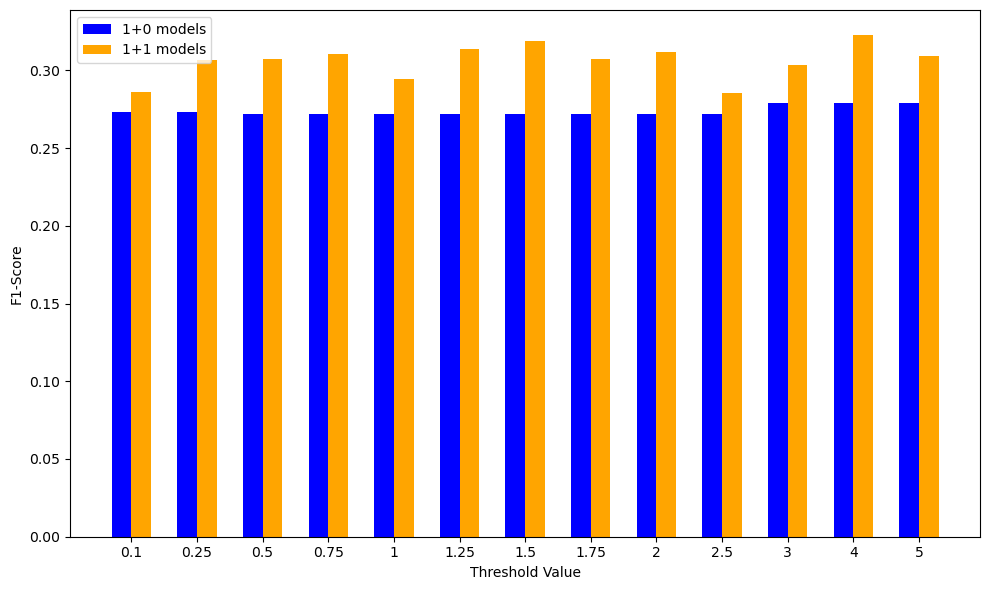

In [35]:
# F1 scores
F1_10 = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("0_thr"), "F1-Score"]
print(F1_10)
F1_11 = df_model_predictive_capability.loc[df_model_predictive_capability.index.str.contains("1_thr"), "F1-Score"]
print(F1_11)
# Number of data points
x = np.arange(len(F1_10))  # Create a range for the x-axis positions

# Bar width
bar_width = 0.3

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
ax.bar(x - bar_width / 2, F1_10, width=bar_width, label='1+0 models', color='blue')
ax.bar(x + bar_width / 2, F1_11, width=bar_width, label='1+1 models', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Threshold Value')
ax.set_ylabel('F1-Score')
ax.set_xticks(x)
ax.set_xticklabels([0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4, 5])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# save confusion matrices in excel for formatting

output_path = current_dir.parent / "outputs" / f"{prefix}gene_essentiality_validation.xlsx"

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    for mdl_name, confusion_matrix in confusion_matrices.items():
        mdl_mod = mdl_name.split("_")[2] + "_" + mdl_name.split("_")[3]
        confusion_matrix.to_excel(writer, sheet_name=f"confusion_{mdl_mod}")    
    for mdl_name, confusion_matrix in very_confusing_matrices.items():
        mdl_mod = mdl_name.split("_")[2] + "_" + mdl_name.split("_")[3]
        confusion_matrix.to_excel(writer, sheet_name=f"confusion_{mdl_mod}_detailed")    

print(f"DataFrames saved to {output_path}")

DataFrames saved to c:\Users\phili\OneDrive - uni-bielefeld.de\Uni\SoSe24\BA\thesis_scripts\outputs\gene_essentiality_validation.xlsx
